# U.S. Medical Insurance Costs

In this independent project we are working with a sample of medical insurance data. We will divide this project into 4 main parts:
1) Exploration,
2) Organization,
3) Analysis,
4) Results.

## Exploration ##

First, we look at the data by hand, just by opening the csv file in the terminal

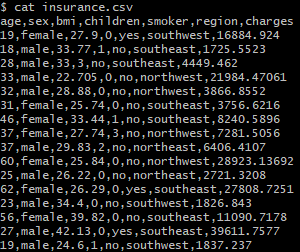

We see from the first few lines of the data set, that we have medical insurance information separated in 7 columns. Looking through the file, it seems that the data is clean and there are no missing rows, columns or cells. The columns are as follows:
1) age,
2) sex,
3) BMI,
4) children,
5) smoker,
6) region,
7) charges.

This is a good starting point for the next step: organization of data. We will use python and its useful libraries, to organize and access data. We will use ChatGPT for advice on code syntax and initial ideation.

## Organization ##
We start by getting our data into usable state, so we can manipulate it using python.

In [78]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [79]:
with open("insurance.csv", "r", newline='') as file:
    reader = csv.DictReader(file)
    data = list(reader)

for row in data[:5]:
    print(row)

# adding id to each row
id_data = []

for idx in range(len(data)):
    current_dict = data[idx]
    current_dict['id'] = idx
    id_data.append(current_dict)

for row in id_data[:5]:
    print(row)


{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}
{'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}
{'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}
{'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061'}
{'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552'}
{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924', 'id': 0}
{'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523', 'id': 1}
{'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charg

Now each row of the `.csv` file is saved as dictionary with column names as keys and the corresponding values for each person. This allows us to filter data by any category (sex, age, etc.)

Let's categorize the data into few categories:
1) Male - Female
2) Smokers - non-smokers
3) younger than 40 - older than 40

These will be initial groups that we will look at as a factors of influencing the cost of insurance.

In [80]:
def extract_males(datas):
    males_data = []
    for person in datas:
        if person['sex'] == 'male':
            males_data.append(person)
    
    return males_data

males_data = extract_males(id_data)


In [81]:
for male in males_data[:5]:
    print(male)

{'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523', 'id': 1}
{'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462', 'id': 2}
{'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061', 'id': 3}
{'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552', 'id': 4}
{'age': '37', 'sex': 'male', 'bmi': '29.83', 'children': '2', 'smoker': 'no', 'region': 'northeast', 'charges': '6406.4107', 'id': 8}


In [82]:
def extract_females(datas):
    females_data = []
    for person in datas:
        if person['sex'] == 'female':
            females_data.append(person)

    return females_data

females_data = extract_females(id_data)

In [83]:
for female in females_data[:5]:
    print(female)

{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924', 'id': 0}
{'age': '31', 'sex': 'female', 'bmi': '25.74', 'children': '0', 'smoker': 'no', 'region': 'southeast', 'charges': '3756.6216', 'id': 5}
{'age': '46', 'sex': 'female', 'bmi': '33.44', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '8240.5896', 'id': 6}
{'age': '37', 'sex': 'female', 'bmi': '27.74', 'children': '3', 'smoker': 'no', 'region': 'northwest', 'charges': '7281.5056', 'id': 7}
{'age': '60', 'sex': 'female', 'bmi': '25.84', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '28923.13692', 'id': 9}


In [84]:
def extract_old_aged(datas):
    old_aged_data = []
    for person in datas:
        if float(person['age']) > float(45):
            old_aged_data.append(person)
    
    return old_aged_data

old_aged_data = extract_old_aged(id_data)

In [85]:
for oldie in old_aged_data[:5]:
    print(oldie)

{'age': '46', 'sex': 'female', 'bmi': '33.44', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '8240.5896', 'id': 6}
{'age': '60', 'sex': 'female', 'bmi': '25.84', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '28923.13692', 'id': 9}
{'age': '62', 'sex': 'female', 'bmi': '26.29', 'children': '0', 'smoker': 'yes', 'region': 'southeast', 'charges': '27808.7251', 'id': 11}
{'age': '56', 'sex': 'female', 'bmi': '39.82', 'children': '0', 'smoker': 'no', 'region': 'southeast', 'charges': '11090.7178', 'id': 13}
{'age': '52', 'sex': 'female', 'bmi': '30.78', 'children': '1', 'smoker': 'no', 'region': 'northeast', 'charges': '10797.3362', 'id': 16}


In [86]:
def extract_young_aged(datas):
    young_aged_data = []
    for person in datas:
        if float(person['age']) < float(45):
            young_aged_data.append(person)
    
    return young_aged_data

young_aged_data = extract_young_aged(id_data)

In [87]:
for youngie in young_aged_data[:5]:
    print(youngie)

{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924', 'id': 0}
{'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523', 'id': 1}
{'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462', 'id': 2}
{'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061', 'id': 3}
{'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552', 'id': 4}


In [88]:
def extract_smokers(datas):
    smokers_data = []
    for person in datas:
        if person['smoker'] == 'yes':
            smokers_data.append(person)
    
    return smokers_data

smokers_data = extract_smokers(id_data)

In [89]:
for smoker in smokers_data[:5]:
    print(smoker)

{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924', 'id': 0}
{'age': '62', 'sex': 'female', 'bmi': '26.29', 'children': '0', 'smoker': 'yes', 'region': 'southeast', 'charges': '27808.7251', 'id': 11}
{'age': '27', 'sex': 'male', 'bmi': '42.13', 'children': '0', 'smoker': 'yes', 'region': 'southeast', 'charges': '39611.7577', 'id': 14}
{'age': '30', 'sex': 'male', 'bmi': '35.3', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '36837.467', 'id': 19}
{'age': '34', 'sex': 'female', 'bmi': '31.92', 'children': '1', 'smoker': 'yes', 'region': 'northeast', 'charges': '37701.8768', 'id': 23}


In [90]:
def extract_nonsmokers(datas):
    nonsmokers_data = []
    for person in datas:
        if person['smoker'] == 'no':
            nonsmokers_data.append(person)
    
    return nonsmokers_data

nonsmokers_data = extract_nonsmokers(id_data)

In [91]:
for nonsmoker in nonsmokers_data[:5]:
    print(nonsmoker)

{'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523', 'id': 1}
{'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462', 'id': 2}
{'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061', 'id': 3}
{'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552', 'id': 4}
{'age': '31', 'sex': 'female', 'bmi': '25.74', 'children': '0', 'smoker': 'no', 'region': 'southeast', 'charges': '3756.6216', 'id': 5}


We have defined some new subsets of our data. We will define also the size of original data set and each of the subsets, to discover, how well each group is represented in the current data sample. We have also added id number to each row in original data, in order to cross reference id's across different subsets.

In [99]:
total_sample_size = len(id_data)
male_amount = len(males_data)
female_amount = len(females_data)
young_amount = len(young_aged_data)
old_amount = len(old_aged_data)
smoker_amount = len(smokers_data)
nonsmoker_amount = len(nonsmokers_data)

all_groups = {"id_data": id_data, "males_data": males_data, "females_data": females_data, "young_aged_data": young_aged_data, "old_aged_data": old_aged_data, "smokers_data": smokers_data, "nonsmokers_data": nonsmokers_data}
len_all_groups = [total_sample_size, male_amount, female_amount, young_amount, old_amount, smoker_amount, nonsmoker_amount]
groups_and_lengths = dict(list(zip(all_groups.keys(), len_all_groups)))
for key, value in groups_and_lengths.items():
    print(key, value)

id_data 1338
males_data 676
females_data 662
young_aged_data 809
old_aged_data 500
smokers_data 274
nonsmokers_data 1064


Now we can extract some useful figures out of the defined variables.
We will
1) extract representation for each group, as percentage of sample size,
2) find out, if there are more male or female smokers,
3) find average medical insurance charges for each group,
4) find cheapest and most expensive groups and subgroups, to analyze the difference of charges between the groups.

In [95]:
def extract_charges(datas):
    """
    Extracts insurance costs of the data set.
    Sum of all costs from chosen dataset.
    """
    charges = 0
    for person in datas:
        charges += float(person['charges'])
    
    return charges

test = extract_charges(id_data)
print(test)

17755824.990759


In [101]:
def get_avg_costs(datas):
    set_key = None
    for key, value in all_groups.items():
        if value == datas:
            set_key = key
    
    costs = extract_charges(datas)
    sample_size = groups_and_lengths[set_key]
    avg_costs = costs / sample_size

    return avg_costs

avg_costs_by_group = dict(list(zip(all_groups.keys(), [get_avg_costs(group) for group in all_groups.values()])))

for item in avg_costs_by_group.items():
    print(item)

('id_data', 13270.422265141257)
('males_data', 13956.751177721886)
('females_data', 12569.57884383534)
('young_aged_data', 10785.580769850425)
('old_aged_data', 17200.42870424)
('smokers_data', 32050.23183153285)
('nonsmokers_data', 8434.268297856199)


## Get the subgroup with the highest and lowest average insurance costs

For this task we will get all the possible combinations of three parameters: sex, smoker status and age treshold 45 years. So this is some kind of a combinatoric problem.



In [148]:
sex_keys = ['males_data', 'females_data']
age_keys = ['young_aged_data', 'old_aged_data']
smoker_keys = ['smokers_data', 'nonsmokers_data']

def get_ids_list(datas):
    ids_list = []
    data_from_dict = all_groups[datas]
    for person in data_from_dict:
        
        ids_list.append(person['id'])
        
    return ids_list

test = get_ids_list("males_data")
print(test)

[1, 2, 3, 4, 8, 10, 12, 14, 15, 17, 18, 19, 22, 24, 28, 29, 30, 33, 34, 35, 37, 38, 39, 42, 44, 45, 49, 52, 53, 55, 57, 60, 61, 62, 67, 69, 71, 73, 74, 75, 77, 80, 82, 85, 92, 93, 97, 98, 99, 101, 105, 107, 108, 109, 110, 112, 114, 115, 116, 120, 121, 123, 129, 133, 136, 137, 140, 141, 142, 143, 144, 146, 149, 150, 151, 155, 156, 157, 158, 162, 164, 165, 169, 170, 171, 172, 176, 177, 180, 182, 184, 185, 190, 192, 194, 195, 204, 206, 207, 209, 210, 211, 212, 217, 222, 223, 224, 225, 226, 229, 233, 234, 237, 238, 239, 243, 245, 247, 248, 249, 250, 252, 253, 254, 256, 258, 259, 262, 263, 265, 266, 268, 269, 270, 271, 272, 273, 274, 276, 278, 281, 282, 285, 289, 291, 292, 294, 295, 296, 297, 298, 300, 305, 308, 310, 312, 313, 315, 316, 317, 319, 320, 322, 323, 324, 325, 327, 329, 331, 335, 336, 337, 338, 341, 343, 346, 347, 349, 353, 355, 356, 357, 358, 361, 368, 369, 373, 374, 377, 379, 381, 382, 384, 385, 387, 390, 392, 393, 395, 397, 398, 401, 403, 404, 408, 409, 410, 413, 416, 418, 420

In [149]:
from functools import reduce

def get_intersection(lists):

    intersection_reduce = list(reduce(lambda x, y: set(x) & set(y), lists))

    return intersection_reduce

test = get_intersection([[1, 2, 3], [2, 3, 4], [2, 3, 4, 5], [1, 2, 3, 4, 5, 6]])
print(test)


[2, 3]


In [159]:
# ugly 3x for loop !!!
def get_subgroup(groups):

    ids_groups = []

    for group in groups:
        ids_groups.append(get_ids_list(group))
    
    return get_intersection(ids_groups)

test = get_subgroup(['females_data', 'smokers_data', 'old_aged_data'])
print(test)
print(len(test))

            

[1281, 1030, 1031, 11, 783, 655, 664, 1176, 543, 288, 419, 301, 175, 818, 1337, 58, 706, 1218, 1096, 328, 330, 843, 845, 852, 86, 854, 1112, 856, 94, 607, 1122, 103, 615, 883, 244, 757, 890, 251]
38


In [137]:
subgroup_ids = {
"young_male_smokers" : get_subgroup(["young_aged_data", "males_data", "smokers_data"]),
"young_male_nonsmokers" : get_subgroup(["young_aged_data", "males_data", "nonsmokers_data"]),
"young_female_smokers" : get_subgroup(["young_aged_data", "females_data", "smokers_data"]),
"young_female_nonsmokers" : get_subgroup(["young_aged_data", "females_data", "nonsmokers_data"]),
"old_male_smokers" : get_subgroup(["old_aged_data", "males_data", "smokers_data"]),
"old_male_nonsmokers" : get_subgroup(["old_aged_data", "males_data", "nonsmokers_data"]),
"old_female_smokers" : get_subgroup(["old_aged_data", "females_data", "smokers_data"]),
"old_female_nonsmokers" : get_subgroup(["old_aged_data", "females_data", "nonsmokers_data"])
}

# i suppose this is left unused

In [138]:
def get_avg_of_subgroups(supergroup, subgroups):

    subgroup = get_subgroup(subgroups)
    costs_list = []

    for person in supergroup:
        if person['id'] in subgroup:
            costs_list.append(person['charges'])
    
    subgroup_costs_sum = 0
    for cost in costs_list:
        subgroup_costs_sum += float(cost)

    return subgroup_costs_sum / len(subgroup)


In [160]:
subgroup_costs = {
"young_male_smokers" : get_avg_of_subgroups(id_data, ["young_aged_data", "males_data", "smokers_data"]),
"young_male_nonsmokers" : get_avg_of_subgroups(id_data, ["young_aged_data", "males_data", "nonsmokers_data"]),
"young_female_smokers" : get_avg_of_subgroups(id_data, ["young_aged_data", "females_data", "smokers_data"]),
"young_female_nonsmokers" : get_avg_of_subgroups(id_data, ["young_aged_data", "females_data", "nonsmokers_data"]),
"old_male_smokers" : get_avg_of_subgroups(id_data, ["old_aged_data", "males_data", "smokers_data"]),
"old_male_nonsmokers" : get_avg_of_subgroups(id_data, ["old_aged_data", "males_data", "nonsmokers_data"]),
"old_female_smokers" : get_avg_of_subgroups(id_data, ["old_aged_data", "females_data", "smokers_data"]),
"old_female_nonsmokers" : get_avg_of_subgroups(id_data, ["old_aged_data", "females_data", "nonsmokers_data"])
}

for key, value in subgroup_costs.items():
    print(key)
    print(value)

young_male_smokers
30063.506948019804
young_male_nonsmokers
5445.845442076679
young_female_smokers
28105.654136973677
young_female_nonsmokers
5794.800323758619
old_male_smokers
38069.32304555555
old_male_nonsmokers
12364.340911917101
old_female_smokers
35587.61419236843
old_female_nonsmokers
13050.343127209298


## Results ##
We can see by this data that average medical insurance costs are higher for females, unless we look at smokers. If you are a smoker, than you have cheaper insurance if you are female, no matter the age.